# <a id="1">Credit Card Fraud Detection</a>  

Dataset has been taken from Kaggle website: https://www.kaggle.com/mlg-ulb/creditcardfraud

# <a id="1">Introduction</a>  

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.173%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**.   

Due to confidentiality issues, there are not provided the original features and more background information about the data.  

* Features **V1**, **V2**, ... **V28** are the **principal components** obtained with **PCA**.  
* The only features which have not been transformed with PCA are **Time** and **Amount**. Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
* Feature **Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise. 

# <a id="1">Steps performed in this notebook:</a>  
- Exploratory Data Analysis
    - Fraud Cases Count
    - Transaction Amount by Class
    - Transaction Time by Class
    - Correlation (Pearson)
    - Feature Density Plot
- Model Building
    - Random Forest Classifier
    - Logistic Regression
    - Adaboost Classifier
    - KNN Classifier
    - Isolation Forest
    - Local Outlier Factor
    - XGBoost Classifier
- Model Evaluation
    - Compare all the models
- Conclusion

# <a id="1">Exploratory Data Analysis</a>  


In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the input data file

dataset=pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check the number of rows and columns in the dataset

dataset.shape

(284807, 31)

In [4]:
# Check missing values. There is no missing data in the entire dataset.

dataset.isnull().values.any()

False

In [5]:
# Check min, max and average values for amount variable

dataset['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Fraud Cases Count

In [6]:
# Check the count of fraud cases and normal cases

fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

outlier_fraction = len(fraud)/float(len(normal))
outlier_fraction

0.0017304750013189597

In [7]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


- Only 492 (or 0.173%) of transaction are fraudulent. 
- That means the data is highly unbalanced with respect with target variable Class. 
- Clearly the dataset is highly imbalanced and need to be handled before applying any machine learning algorithm.

Text(0, 0.5, 'Frequency')

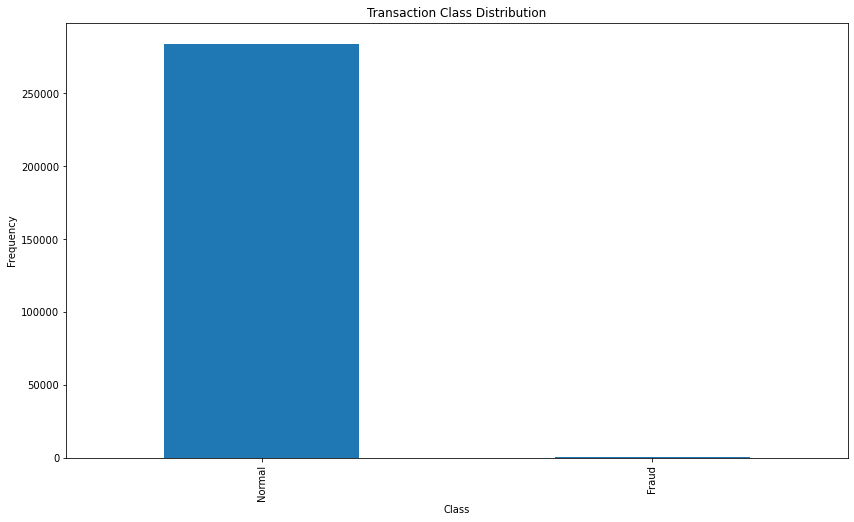

In [8]:
# Visualize the count of fraud and normal cases

LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

### Transaction Amount by Class

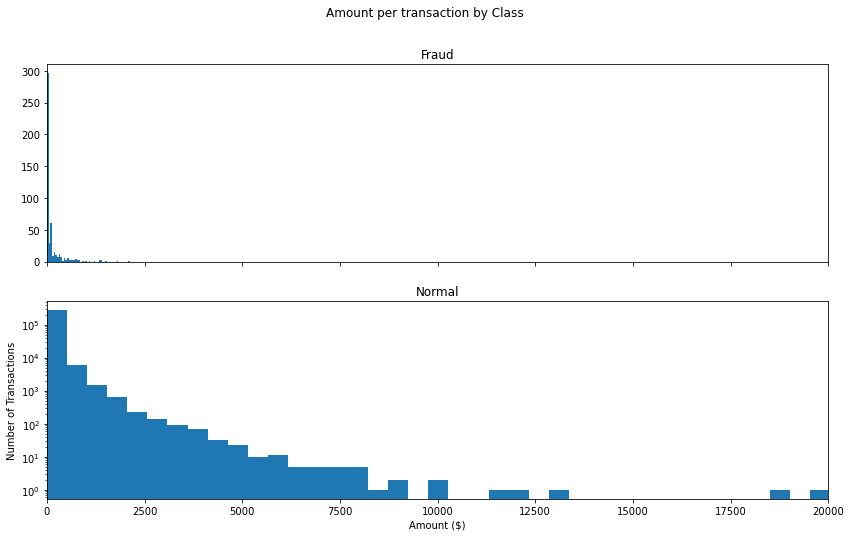

In [9]:
# Check the difference in the amount of money used in different transaction classes

f, (x1, x2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')
x1.hist(fraud.Amount, bins = 50)
x1.set_title('Fraud')
x2.hist(normal.Amount, bins = 50)
x2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

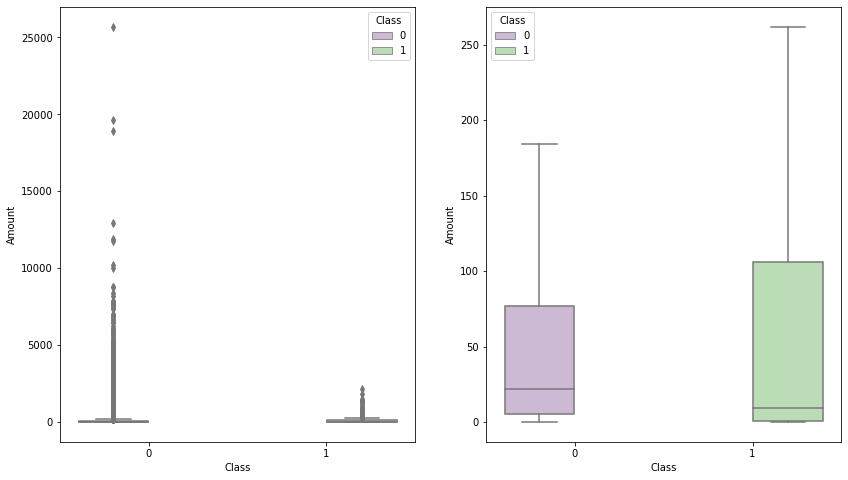

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class", data=dataset, palette="PRGn", showfliers=True)
sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class", data=dataset, palette="PRGn", showfliers=False)

In [11]:
tmp = dataset[['Amount','Class']].copy()
normal_class = tmp.loc[tmp['Class'] == 0]['Amount']
fraud_class = tmp.loc[tmp['Class'] == 1]['Amount']
normal_class.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud_class.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

- From the above graphs it is clear that in case of fraud, smaller amount transactions are done.
- The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers.
- The fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

### Transaction Time by Class

Text(0, 0.5, 'Amount')

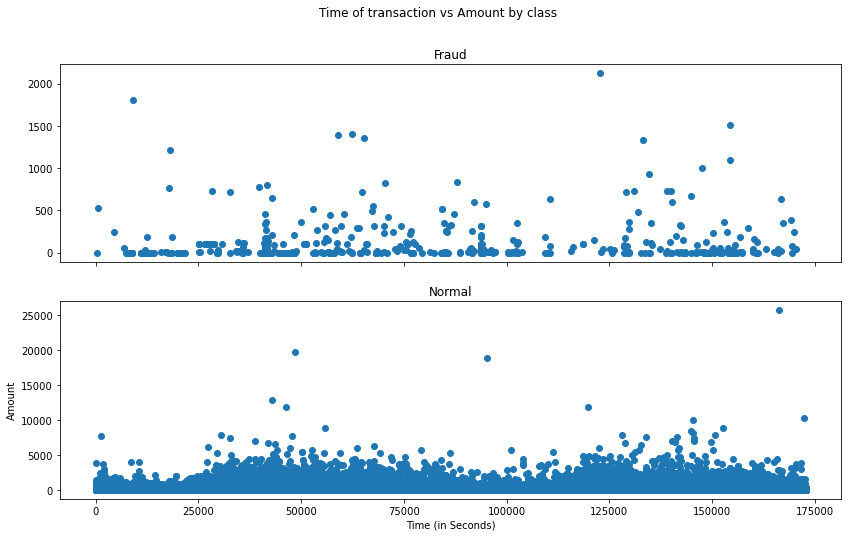

In [13]:
# Check if fraudulent transactions occur more often during certain time frame

f, (x1, x2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
x1.scatter(fraud.Time, fraud.Amount)
x1.set_title('Fraud')
x2.scatter(normal.Time, normal.Amount)
x2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

In [14]:
# Transactions in time

class_0 = dataset.loc[dataset['Class'] == 0]["Time"]
class_1 = dataset.loc[dataset['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig)

- Fraudulent transactions have a distribution more even than valid transactions.
- They are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

### Correlation (Pearson)

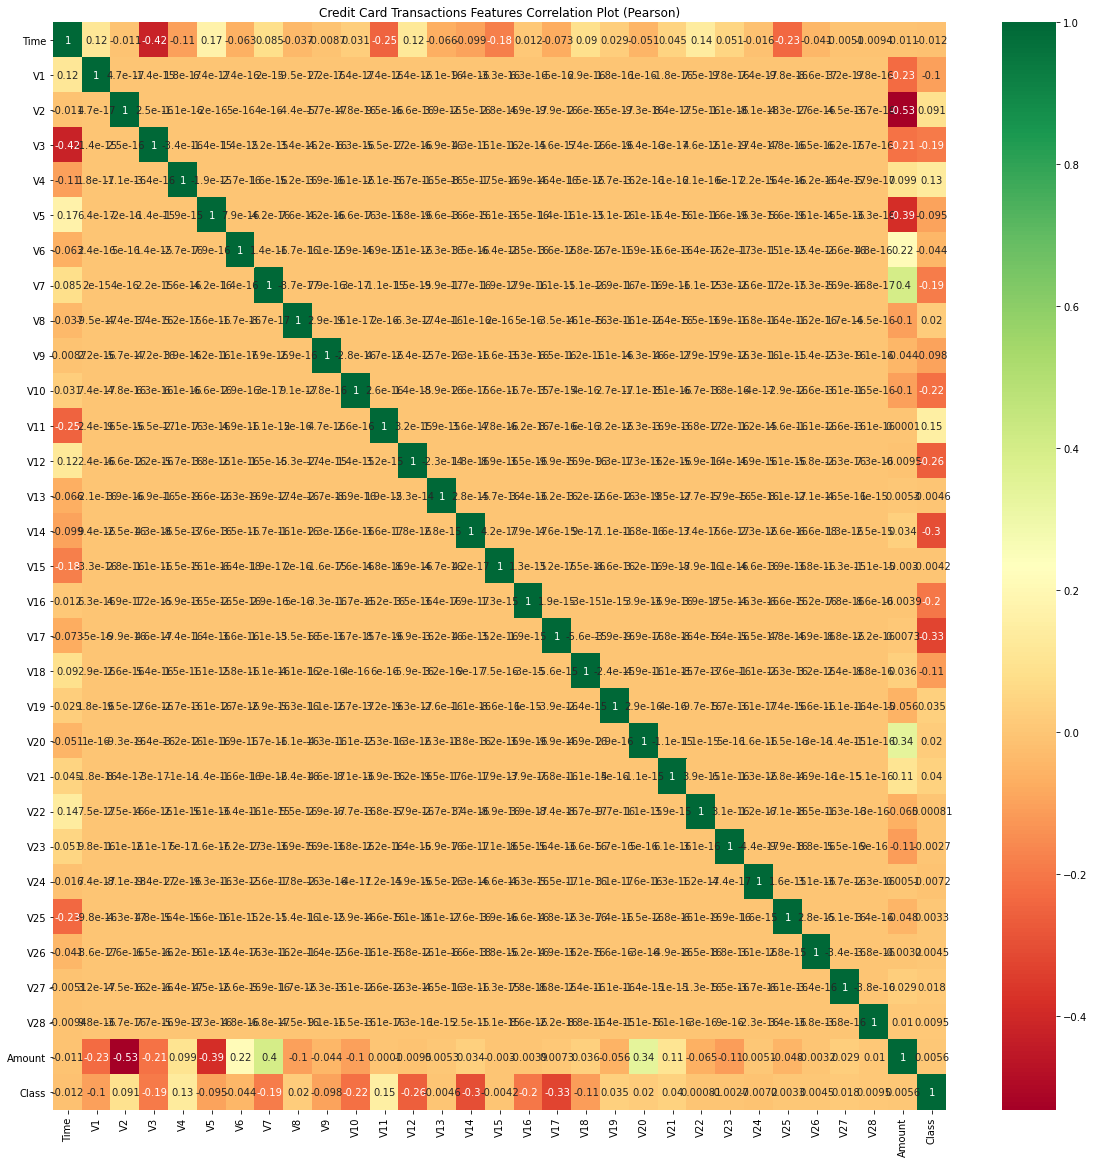

In [15]:
# Check correlation between different variables

plt.figure(figsize=(20,20))
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)')
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn")

- As expected, there is no notable correlation between features V1-V28. 
- There are certain correlations between some of these features and Time (inverse correlation with V3) 
- There are also some correlations between some of these features and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

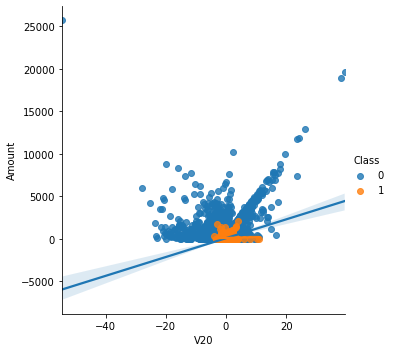

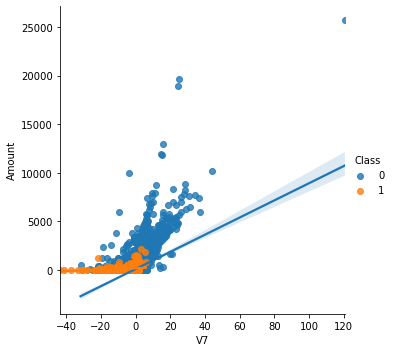

In [16]:
# Plot the correlated and inverse correlated values on the same graph.
# Direct correlated values: {V20, Amount} and {V7, Amount}.

sns.lmplot(x='V20', y='Amount', data=dataset, hue='Class', fit_reg=True)
sns.lmplot(x='V7', y='Amount', data=dataset, hue='Class', fit_reg=True)

- We can confirm that the two couples of features are correlated.
- The regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope.

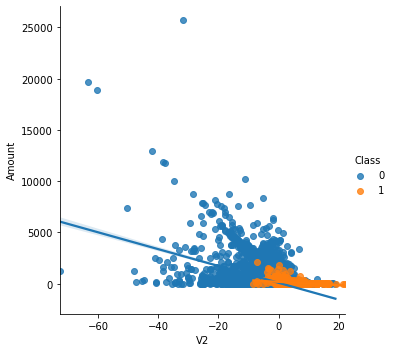

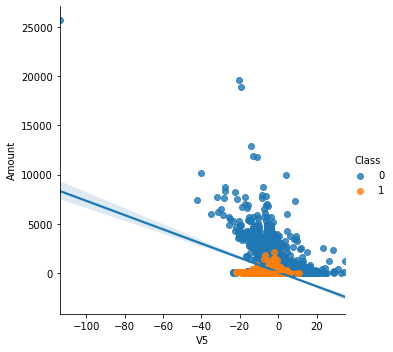

In [17]:
# Inverse correlated values: {V2, Amount} and {V5, Amount}.

sns.lmplot(x='V2', y='Amount', data=dataset, hue='Class', fit_reg=True)
sns.lmplot(x='V5', y='Amount', data=dataset, hue='Class', fit_reg=True)

- We can confirm that the two couples of features are inverse correlated.
- The regression lines for Class = 0 have a negative slope, while the regression lines for Class = 1 have a very small negative slope.

### Feature Density Plot

<Figure size 1008x576 with 0 Axes>

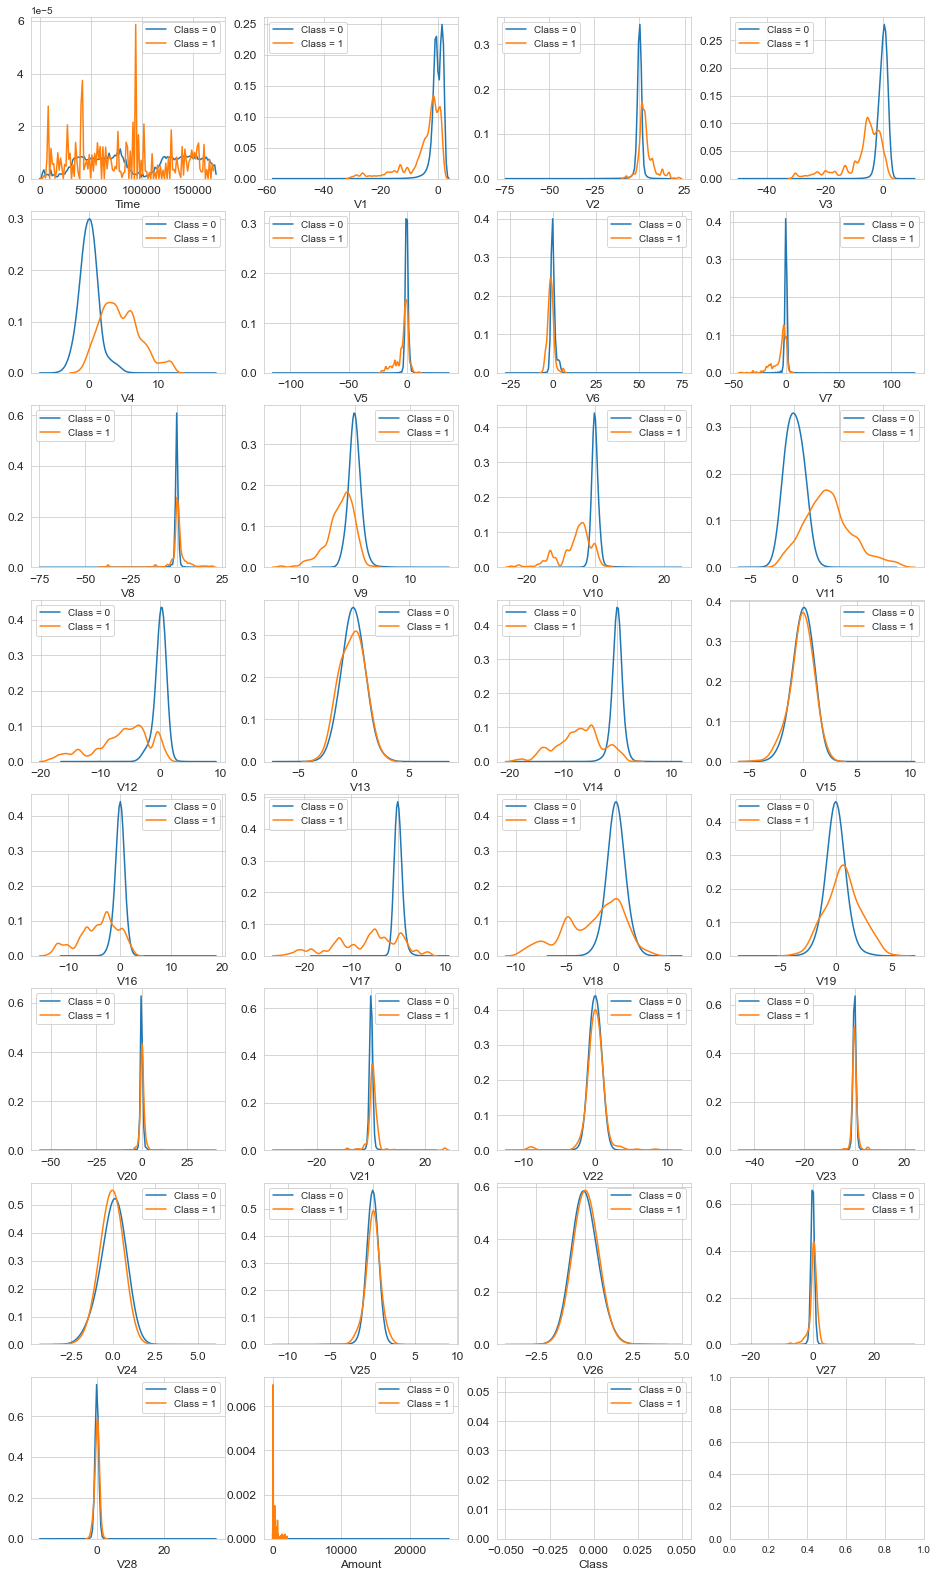

In [18]:
var = dataset.columns.values

i = 0
t0 = dataset.loc[dataset['Class'] == 0]
t1 = dataset.loc[dataset['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

- For some of the features we can observe a good selectivity in terms of distribution for the two values of Class.
- V4, V11 have clearly separated distributions for Class values 0 and 1.
- V12, V14, V18 are partially separated
- V1, V2, V3, V10 have a quite distinct profile
- V20, V22, V24, V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

# <a id="1">Model Building</a>  

In [19]:
# Create Independent Features list

columns = dataset.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]

In [20]:
# Store the variable we are predicting in target

target = "Class"
X = dataset[columns]
y = dataset[target]

In [21]:
# Print the shapes of X & y

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [22]:
# Train test data split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create lists to store test results of all models
pmodel=[]
n_error=[]
accuracy=[]
auc=[]
fnr=[]
fpr=[]

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

n_errors_rf = (y_pred_rf != y_test).sum()
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

print("##### Random Forest Result #####")
print("Error Count :", n_errors_rf)
print("Accuracy Score :", accuracy_rf)
print("Area Under the Curve:", auc_rf)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test, y_pred_rf))
print("Classification Report :")
print(classification_report(y_test, y_pred_rf))

fnr_rf = metrics.confusion_matrix(y_test, y_pred_rf)[1,0]
fpr_rf = metrics.confusion_matrix(y_test, y_pred_rf)[0,1]

pmodel.append('RF')
n_error.append(n_errors_rf)
accuracy.append(accuracy_rf)
auc.append(auc_rf)
fnr.append(fnr_rf)
fpr.append(fpr_rf)

##### Random Forest Result #####
Error Count : 31
Accuracy Score : 0.9996371850239341
Area Under the Curve: 0.9153942870007911
Confusion Metrics :
[[85299     8]
 [   23   113]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.83      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



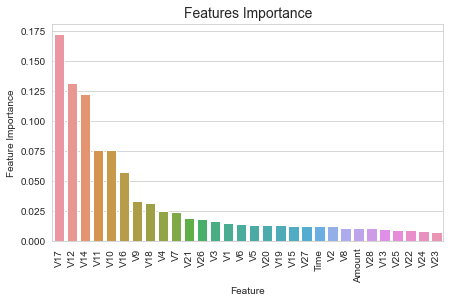

In [24]:
tmp = pd.DataFrame({'Feature': columns, 'Feature Importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance', ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features Importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature Importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()   

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

n_errors_lr = (y_pred_lr != y_test).sum()
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

print("##### Logistic Regression Result #####")
print("Error Count :", n_errors_lr)
print("Accuracy Score :", accuracy_lr)
print("Area Under the Curve:", auc_lr)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test, y_pred_lr))
print("Classification Report :")
print(classification_report(y_test, y_pred_lr))

fnr_lr = metrics.confusion_matrix(y_test, y_pred_lr)[1,0]
fpr_lr = metrics.confusion_matrix(y_test, y_pred_lr)[0,1]

pmodel.append('LogiR')
n_error.append(n_errors_lr)
accuracy.append(accuracy_lr)
auc.append(auc_lr)
fnr.append(fnr_lr)
fpr.append(fpr_lr)

##### Logistic Regression Result #####
Error Count : 104
Accuracy Score : 0.9987828142738434
Area Under the Curve: 0.8195305760716141
Confusion Metrics :
[[85252    55]
 [   49    87]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.61      0.64      0.63       136

    accuracy                           1.00     85443
   macro avg       0.81      0.82      0.81     85443
weighted avg       1.00      1.00      1.00     85443



### Adaboost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

n_errors_ada = (y_pred_ada != y_test).sum()
accuracy_ada = accuracy_score(y_test,y_pred_ada)
auc_ada = roc_auc_score(y_test,y_pred_ada)

print("##### Adaboost Classifier Result #####")
print("Error Count :",n_errors_ada)
print("Accuracy Score :", accuracy_ada)
print("Area Under the Curve:", auc_ada)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test,y_pred_ada))
print("Classification Report :")
print(classification_report(y_test,y_pred_ada))

fnr_ada=metrics.confusion_matrix(y_test,y_pred_ada)[1,0]
fpr_ada=metrics.confusion_matrix(y_test,y_pred_ada)[0,1]

pmodel.append('AdaB')
n_error.append(n_errors_ada)
accuracy.append(accuracy_ada)
auc.append(auc_ada)
fnr.append(fnr_ada)
fpr.append(fpr_ada)

##### Adaboost Classifier Result #####
Error Count : 58
Accuracy Score : 0.9993211848834895
Area Under the Curve: 0.8675181127815867
Confusion Metrics :
[[85285    22]
 [   36   100]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.74      0.78       136

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



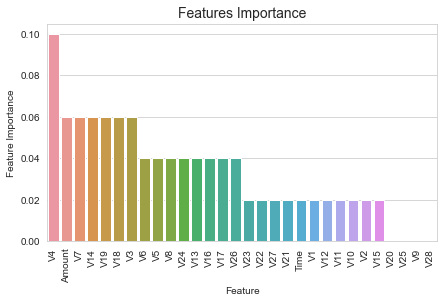

In [27]:
tmp = pd.DataFrame({'Feature': columns, 'Feature Importance': ada_classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance', ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features Importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature Importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

### KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

n_errors_knn = (y_pred_knn != y_test).sum()
accuracy_knn = accuracy_score(y_test,y_pred_knn)
auc_knn = roc_auc_score(y_test,y_pred_knn)

print("##### KNN Classifier Result #####")
print("Error Count :",n_errors_knn)
print("Accuracy Score :", accuracy_knn)
print("Area Under the Curve:", auc_knn)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test,y_pred_knn))
print("Classification Report :")
print(classification_report(y_test,y_pred_knn))

fnr_knn=metrics.confusion_matrix(y_test,y_pred_knn)[1,0]
fpr_knn=metrics.confusion_matrix(y_test,y_pred_knn)[0,1]

pmodel.append('KNN')
n_error.append(n_errors_knn)
accuracy.append(accuracy_knn)
auc.append(auc_knn)
fnr.append(fnr_knn)
fpr.append(fpr_knn)

##### KNN Classifier Result #####
Error Count : 130
Accuracy Score : 0.9984785178423042
Area Under the Curve: 0.5220588235294118
Confusion Metrics :
[[85307     0]
 [  130     6]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.04      0.08       136

    accuracy                           1.00     85443
   macro avg       1.00      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443



### Isolation Forest Algorithm

- Anomaly Detection Algorithm:

     One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.
     

- Benifits:

     This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set. Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.
     

- How Isolation Forests Work:

     The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.
     The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

In [29]:
from sklearn.ensemble import IsolationForest

state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

iso_forest=IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=state)
iso_forest.fit(X_train, y_train)
y_pred_iso = iso_forest.predict(X_test)

In [30]:
# Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions

y_pred_iso[y_pred_iso == 1] = 0
y_pred_iso[y_pred_iso == -1] = 1

n_errors_iso = (y_pred_iso != y_test).sum()
accuracy_iso = accuracy_score(y_test,y_pred_iso)
auc_iso = roc_auc_score(y_test,y_pred_iso)

print("##### Isolation Forest Result #####")
print("Error Count :",n_errors_iso)
print("Accuracy Score :", accuracy_iso)
print("Area Under the Curve:", auc_iso)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test,y_pred_iso))
print("Classification Report :")
print(classification_report(y_test,y_pred_iso))

fnr_iso=metrics.confusion_matrix(y_test,y_pred_iso)[1,0]
fpr_iso=metrics.confusion_matrix(y_test,y_pred_iso)[0,1]

pmodel.append('IsoF')
n_error.append(n_errors_iso)
accuracy.append(accuracy_iso)
auc.append(auc_iso)
fnr.append(fnr_iso)
fpr.append(fpr_iso)

##### Isolation Forest Result #####
Error Count : 178
Accuracy Score : 0.9979167398148473
Area Under the Curve: 0.6759430817000743
Confusion Metrics :
[[85217    90]
 [   88    48]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.35      0.35      0.35       136

    accuracy                           1.00     85443
   macro avg       0.67      0.68      0.67     85443
weighted avg       1.00      1.00      1.00     85443



### Local Outlier Factor Algorithm (LOF)

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen:
- greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster
- smaller than the maximum number of close by objects that can potentially be local outliers. 

In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [31]:
from sklearn.neighbors import LocalOutlierFactor

lof=LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30, 
                       metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction)
y_pred_lof=lof.fit_predict(X_test)

# Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

n_errors_lof = (y_pred_lof != y_test).sum()
accuracy_lof = accuracy_score(y_test,y_pred_lof)
auc_lof = roc_auc_score(y_test,y_pred_lof)

print("##### Local Outlier Factor Result #####")
print("Error Count :",n_errors_lof)
print("Accuracy Score :", accuracy_lof)
print("Area Under the Curve:", auc_lof)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test,y_pred_lof))
print("Classification Report :")
print(classification_report(y_test,y_pred_lof))

fnr_lof=metrics.confusion_matrix(y_test,y_pred_lof)[1,0]
fpr_lof=metrics.confusion_matrix(y_test,y_pred_lof)[0,1]

pmodel.append('LOF')
n_error.append(n_errors_lof)
accuracy.append(accuracy_lof)
auc.append(auc_lof)
fnr.append(fnr_lof)
fpr.append(fpr_lof)

##### Local Outlier Factor Result #####
Error Count : 282
Accuracy Score : 0.9966995540886907
Area Under the Curve: 0.5028148765807094
Confusion Metrics :
[[85160   147]
 [  135     1]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.01      0.01      0.01       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



### XGBoost Classifier

In [37]:
# Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25],
 "max_depth"        : [2, 4, 6, 9, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.1, 0.2, 0.3, 0.4],
 "eval_metric"      : ['auc', 'logloss'],
 "colsample_bytree" : [0.3, 0.5, 0.7]
}

In [38]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

xgb_classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(xgb_classifier, param_distributions=params, n_iter=5, scoring='roc_auc', cv=5)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [39]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=6, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'eval_metric': 'auc',
 'colsample_bytree': 0.5}

In [41]:
xgb_classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='auc',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=6, min_child_weight=7, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

n_errors_xgb = (y_pred_xgb != y_test).sum()
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
auc_xgb = roc_auc_score(y_test,y_pred_xgb)

print("##### XGBoost Classifier Result #####")
print("Error Count :", n_errors_xgb)
print("Accuracy Score :", accuracy_xgb)
print("Area Under the Curve:", auc_xgb)
print("Confusion Metrics :")
print(metrics.confusion_matrix(y_test, y_pred_xgb))
print("Classification Report :")
print(classification_report(y_test, y_pred_xgb))

fnr_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)[1,0]
fpr_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)[0,1]

pmodel.append('XGB')
n_error.append(n_errors_xgb)
accuracy.append(accuracy_xgb)
auc.append(auc_xgb)
fnr.append(fnr_xgb)
fpr.append(fpr_xgb)

##### XGBoost Classifier Result #####
Error Count : 31
Accuracy Score : 0.9996371850239341
Area Under the Curve: 0.904382458787259
Confusion Metrics :
[[85302     5]
 [   26   110]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.81      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



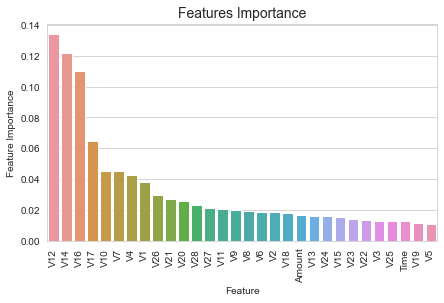

In [42]:
tmp = pd.DataFrame({'Feature': columns, 'Feature Importance': xgb_classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance', ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features Importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature Importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

# <a id="1">Model Evaluation</a>  

### Compare all the Models

In [43]:
pmodel

['RF', 'LogiR', 'AdaB', 'KNN', 'IsoF', 'LOF', 'XGB']

In [44]:
n_error

[31, 104, 58, 130, 178, 282, 31]

In [45]:
accuracy

[0.9996371850239341,
 0.9987828142738434,
 0.9993211848834895,
 0.9984785178423042,
 0.9979167398148473,
 0.9966995540886907,
 0.9996371850239341]

In [46]:
auc

[0.9153942870007911,
 0.8195305760716141,
 0.8675181127815867,
 0.5220588235294118,
 0.6759430817000743,
 0.5028148765807094,
 0.904382458787259]

In [47]:
fpr

[8, 55, 22, 0, 90, 147, 5]

In [48]:
fnr

[23, 49, 36, 130, 88, 135, 26]

Text(0, 0.5, 'Error Count')

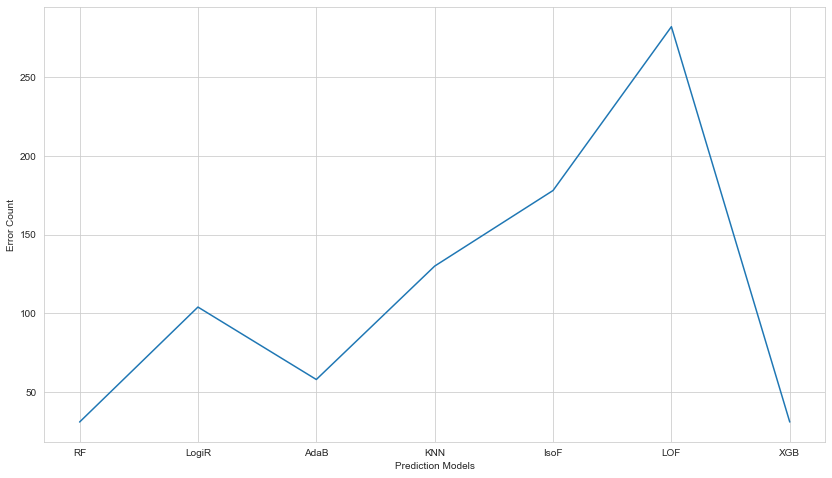

In [49]:
plt.plot(pmodel, n_error)
plt.xlabel('Prediction Models')
plt.ylabel('Error Count')

Text(0, 0.5, 'Accuracy Rate')

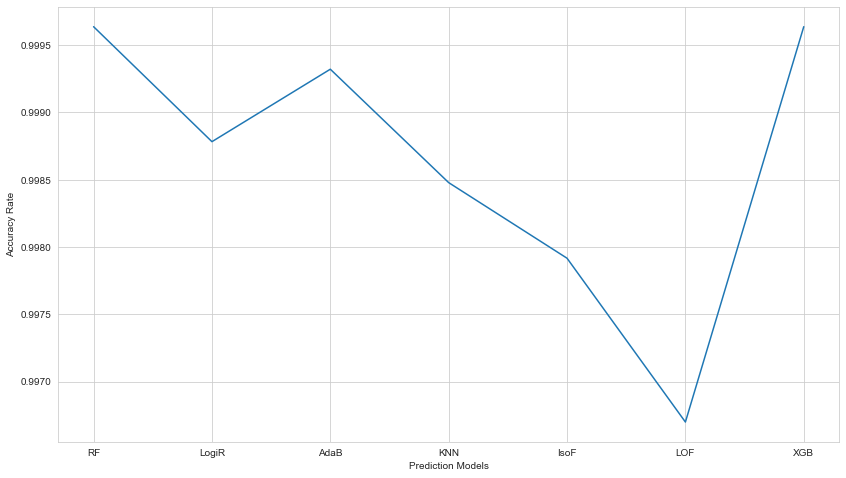

In [50]:
plt.plot(pmodel, accuracy)
plt.xlabel('Prediction Models')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Area Under the Curve')

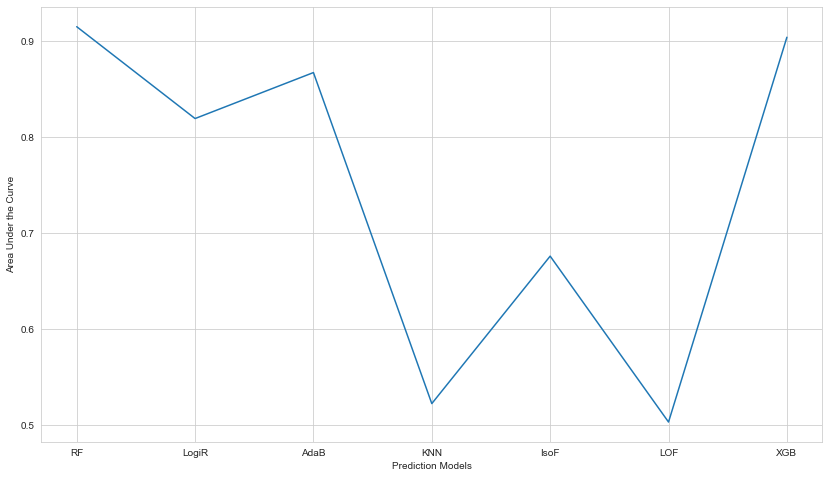

In [51]:
plt.plot(pmodel, auc)
plt.xlabel('Prediction Models')
plt.ylabel('Area Under the Curve')

Text(0, 0.5, 'False Positive Rate')

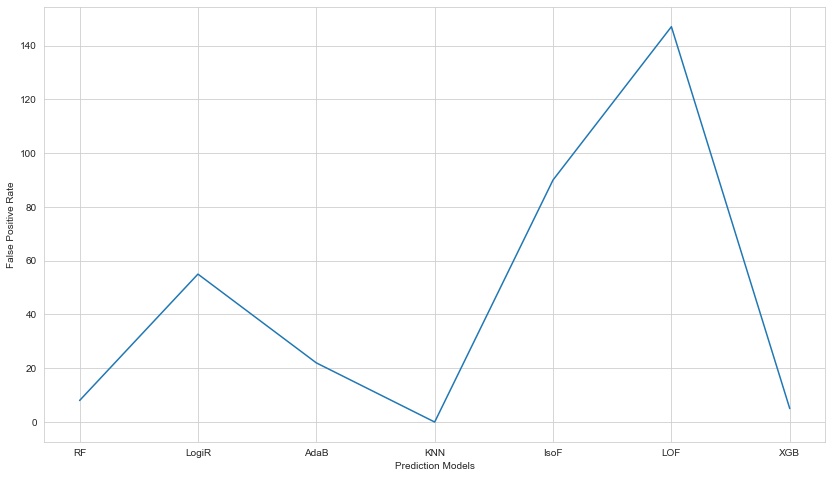

In [52]:
plt.plot(pmodel, fpr)
plt.xlabel('Prediction Models')
plt.ylabel('False Positive Rate')

Text(0, 0.5, 'False Negative Rate')

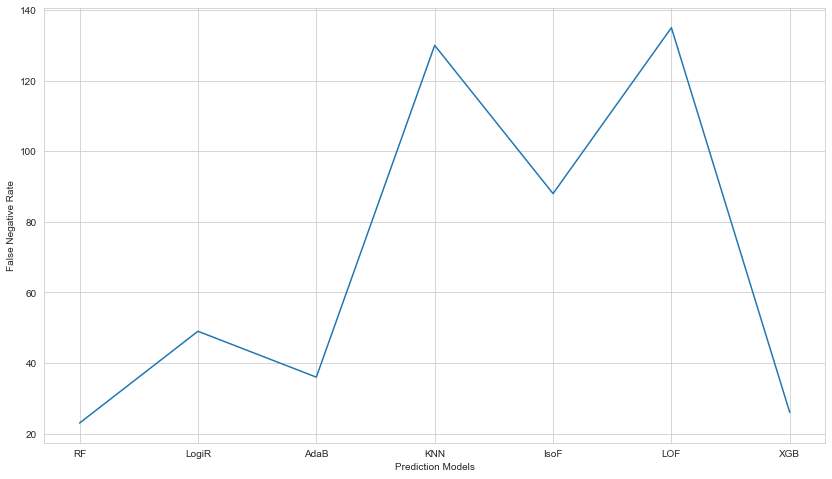

In [53]:
plt.plot(pmodel, fnr)
plt.xlabel('Prediction Models')
plt.ylabel('False Negative Rate')

# <a id="1">Conclusion</a> 

- Random Forest and XGBoost algorithm with hyperparameter optimization gives the best result with highest ROC-AUC score of approx 0.90.
- KNN, Logistic Regression, Isolation Forest and LOF did not performed well with highly imbalanced data.
- Accuracy Rate is not the correct parameter to define model performace in imbalanced dataset.
- XGBoost has lowest false postive rate and false negative rate.
- V12, V14, V16 and V17 are the most imporatant features.
- Overall, XGBoost with hyperparameter optimization works best in this case.